# Elevation of Surficial Units

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import datasets

df1 = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\surficial_till_new.csv')
df2 = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\surficial_glacilac_new.csv')
df3 = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\bedrock_new.csv')

df1.head()
print("Max elevation: ")
print(df1[["Till"]].max())

Max elevation: 
Till    430
dtype: int64


In [3]:
df2.head()

,X,Y,Glaciolacustrine
0,695552.652500,5.347235e+06,312
1,695569.889578,5.347235e+06,311
2,695587.126656,5.347235e+06,310
3,695604.363734,5.347235e+06,310
4,695621.600812,5.347235e+06,310


In [4]:
df3.head()

,X,Y,Elevation
0,697103.989491,5.347235e+06,323
1,697121.226569,5.347235e+06,324
2,697138.463647,5.347235e+06,324
3,697155.700725,5.347235e+06,324
4,697172.937802,5.347235e+06,324


In [5]:
#Set headers

df1.columns = ('X', 'Y', 'Till')
df2.columns = ('X', 'Y', 'Glaciolacustrine')
df3.columns = ('X', 'Y', 'Bedrock')

df3.head()

,X,Y,Bedrock
0,697103.989491,5.347235e+06,323
1,697121.226569,5.347235e+06,324
2,697138.463647,5.347235e+06,324
3,697155.700725,5.347235e+06,324
4,697172.937802,5.347235e+06,324


In [6]:
#Combine dataframes

df4 = pd.concat([df1, df2, df3], axis=1)

df4.head()

,X,Y,Till,X,Y,Glaciolacustrine,X,Y,Bedrock
0,730130.230707,5.347201e+06,309.0,695552.652500,5.347235e+06,312,697103.989491,5.347235e+06,323.0
1,730147.467785,5.347201e+06,310.0,695569.889578,5.347235e+06,311,697121.226569,5.347235e+06,324.0
2,730164.704863,5.347201e+06,310.0,695587.126656,5.347235e+06,310,697138.463647,5.347235e+06,324.0
3,730181.941941,5.347201e+06,310.0,695604.363734,5.347235e+06,310,697155.700725,5.347235e+06,324.0
4,730199.179019,5.347201e+06,310.0,695621.600812,5.347235e+06,310,697172.937802,5.347235e+06,324.0


In [7]:
#Extracting features

sub_df=df4[['Till', 'Glaciolacustrine', 'Bedrock']].copy()   
sub_df.head()

,Till,Glaciolacustrine,Bedrock
0,309.0,312,323.0
1,310.0,311,324.0
2,310.0,310,324.0
3,310.0,310,324.0
4,310.0,310,324.0


Skew:
Till    0.510697
dtype: float64


Kurtosis:
Till    0.354001
dtype: float64


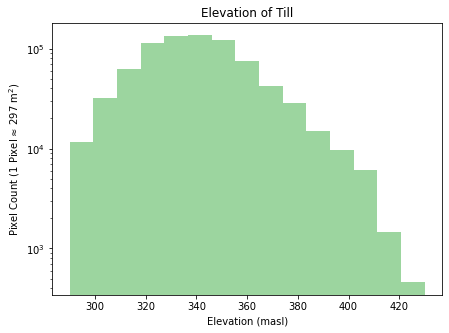

In [8]:
#Histogram for till

colors = ['#73c476']

sub_df[["Till"]].plot.hist(alpha=0.7,
                        bins=15,
                        color=colors,
                        log=True,
                        grid=False,
                        figsize = (7,5),
                        legend=False)

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

plt.title('Elevation of Till')

#https://pythontic.com/pandas/dataframe-computations/skew
#calculate sample skewness
#axis=0 because the values are in a column
print("Skew:")
print(sub_df[["Till"]].skew(axis=0))

#add whitespace
print("\n")

#calculate sample kurtosis
print("Kurtosis:")
print(sub_df[["Till"]].kurtosis(axis=0))

Text(0.5, 1.0, 'Elevation of Bedrock Outcrops')

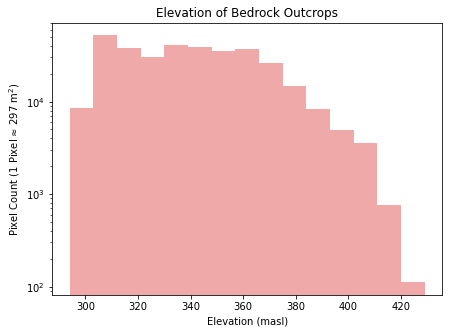

In [9]:
#Histogram for bedrock

colors = ['#e98585']

sub_df[["Bedrock"]].plot.hist(alpha=0.7,
                        bins=15,
                        color=colors,
                        log=True,
                        grid=False,
                        figsize = (7,5),
                        legend=False)

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

plt.title('Elevation of Bedrock Outcrops')


Min elevation: 
Glaciolacustrine    286
dtype: int64


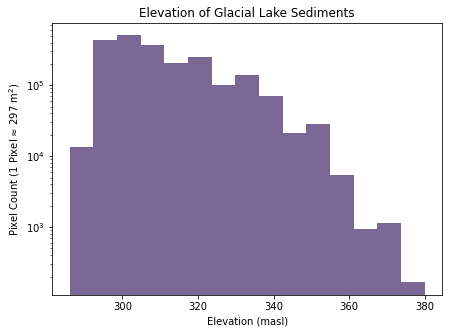

In [10]:
#Histogram for Glaciolacustrine seds

colors = ['#422766']

sub_df[["Glaciolacustrine"]].plot.hist(alpha=0.7,
                        bins=15,
                        color=colors,
                        log=True,
                        grid=False,
                        figsize = (7,5),
                        legend=False)

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

plt.title('Elevation of Glacial Lake Sediments')

print("Min elevation: ")
print(sub_df[["Glaciolacustrine"]].min())

Text(0.5, 1.0, 'Elevation of Bedrock, Till & Glacial Lake Sediments')

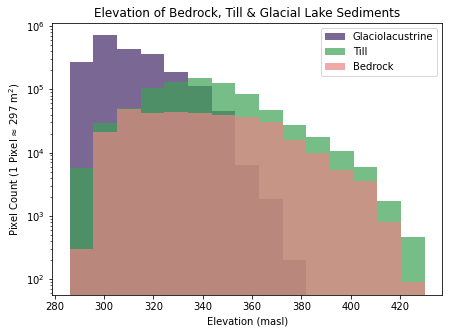

In [11]:
#Histogram for three main surficial units

colors = ['#422766', '#3ca156',  '#e98585']

sub_df[["Glaciolacustrine", "Till", "Bedrock"]].plot.hist(alpha=0.7,
                                                     bins=15,
                                                     color=colors,
                                                     log=True,
                                                     grid=False,
                                                     figsize = (7,5))

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

plt.title('Elevation of Bedrock, Till & Glacial Lake Sediments')

## Till Subunits

In [12]:
df5 = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\surficial_till_elevation.csv')

df5.head()

,Continuous,Discontinuous
0,309.0,313
1,310.0,313
2,310.0,314
3,310.0,314
4,310.0,320


In [13]:
#Color Brewer palettes
#brewermap.m
#https://www.codecademy.com/article/seaborn-design-ii

print("Color Brewer Palettes:")

pal = sns.color_palette("Greens", 2)
print("Greens: ", pal.as_hex())

pal = sns.color_palette("Greens", 1)
print("Greens: ", pal.as_hex())

Color Brewer Palettes:
Greens:  ['#aedea7', '#37a055']
Greens:  ['#73c476']


Text(0.5, 1.0, 'Elevation of Till Subunits')

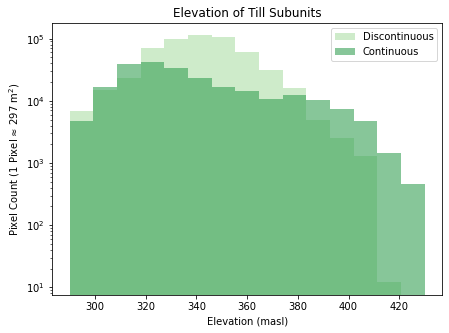

In [14]:
#Histogram showing subunits

colors = ['#aedea7', '#37a055']

df5[["Discontinuous", "Continuous"]].plot.hist(alpha=0.6,                           
                                              bins=15,
                                              color=colors,
                                              log=True,
                                              grid=False,
                                              figsize = (7,5))
                                        

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

plt.title('Elevation of Till Subunits')

In [15]:
df6 = pd.concat([sub_df, df5], axis=1)

df6.head()

,Till,Glaciolacustrine,Bedrock,Continuous,Discontinuous
0,309.0,312,323.0,309.0,313.0
1,310.0,311,324.0,310.0,313.0
2,310.0,310,324.0,310.0,314.0
3,310.0,310,324.0,310.0,314.0
4,310.0,310,324.0,310.0,320.0


Note: There is more continuous till than discontinuous till above the maximum elevation of glacial lake sediments.


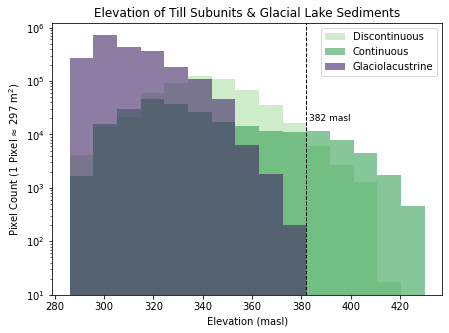

In [16]:
#Histogram showing till subunits and glacial lake sed

colors = ['#aedea7','#37a055', '#422766']

df6[["Discontinuous", "Continuous", "Glaciolacustrine"]].plot.hist(alpha=0.6,                           
                                              bins=15,
                                              color=colors,
                                              log=True,
                                              grid=False,
                                              #legend=False,
                                              figsize = (7,5))
                                        

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

#add line
plt.axvline(x=382, color='k', linestyle='--', linewidth=1)

#text for line
plt.text(383, 18000, '382 masl', fontsize=9)

plt.title('Elevation of Till Subunits & Glacial Lake Sediments')

#plt.savefig(r'C:\Users\ctayl\Desktop\Malartic\Python\Elevation_glac_tills.png', format='png')

print("Note: There is more continuous till than discontinuous till above the maximum elevation of glacial lake sediments.")

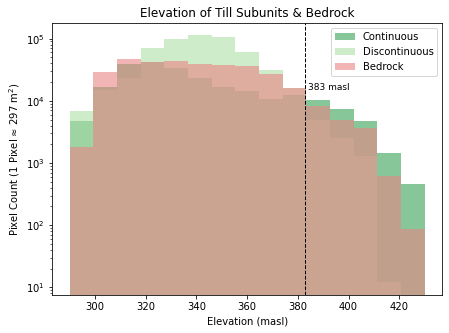

In [17]:
#Histogram showing till subunits and bedrock

colors = ['#37a055', '#aedea7', '#e98585']

df6[["Continuous", "Discontinuous", "Bedrock"]].plot.hist(alpha=0.6,                           
                                              bins=15,
                                              color=colors,
                                              log=True,
                                              grid=False,
                                              figsize = (7,5))
                                        

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

#add line
plt.axvline(x=383, color='k', linestyle='--', linewidth=1)

#text for line
plt.text(384, 15000, '383 masl', fontsize=9)

plt.title('Elevation of Till Subunits & Bedrock')

plt.savefig(r'C:\Users\ctayl\Desktop\Malartic\Python\Elevation_bedrock_till.png', format='png')

## Glacial Lake Sediment Subunits

In [18]:
#Read databases

df7 = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\Deep_lake_mud_new2.csv')
df8 = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\Deep_to_shallow_lake_mud_new.csv')
df9 = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\Shallow_lake_mud_new2.csv')

df7.head()

,X,Y,Elevation
0,695673.312062,5.347235e+06,310
1,695690.549140,5.347235e+06,310
2,695707.786218,5.347235e+06,310
3,695725.023296,5.347235e+06,310
4,695742.260373,5.347235e+06,310


In [19]:
#Set headers
df7.columns = ('X', 'Y', 'Deep water')
df8.columns = ('X', 'Y', 'Deep-to-shallow')
df9.columns = ('X', 'Y', 'Shallow water')

df7.head()

,X,Y,Deep water
0,695673.312062,5.347235e+06,310
1,695690.549140,5.347235e+06,310
2,695707.786218,5.347235e+06,310
3,695725.023296,5.347235e+06,310
4,695742.260373,5.347235e+06,310


In [20]:
#Combine dataframes

df10 = pd.concat([df7, df8, df9], axis=1)

#Extracting features

sub_df2=df10[['Deep water', 'Deep-to-shallow', 'Shallow water']].copy()   
sub_df2.head()

,Deep water,Deep-to-shallow,Shallow water
0,310,298.0,312.0
1,310,298.0,311.0
2,310,298.0,310.0
3,310,297.0,310.0
4,310,297.0,310.0


In [21]:
#Color Brewer palettes
#brewermap.m
#https://www.codecademy.com/article/seaborn-design-ii

print("Color Brewer Palettes:")

pal = sns.color_palette("Purples", 3)
print("Purples: ", pal.as_hex())

Color Brewer Palettes:
Purples:  ['#dadaeb', '#9e9ac8', '#6950a3']


Text(0.5, 1.0, 'Elevation of Glaciolacustrine Sediment Subunits')

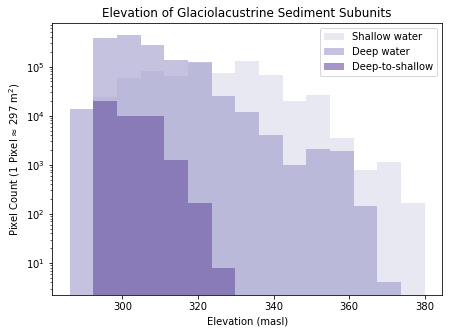

In [22]:
#Histogram of Glacial Lake Subunits
colors = ['#dadaeb', '#9e9ac8', '#6950a3']

sub_df2[["Shallow water", "Deep water", "Deep-to-shallow"]].plot.hist(alpha=0.6,
                                                     bins=15,
                                                     color=colors,
                                                     log=True,
                                                     grid=False,
                                                     figsize = (7,5))


plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')


plt.title('Elevation of Glaciolacustrine Sediment Subunits')

In [23]:
df11 = pd.concat([sub_df2, df6], axis=1)

df11.head()

,Deep water,Deep-to-shallow,Shallow water,Till,Glaciolacustrine,Bedrock,Continuous,Discontinuous
0,310.0,298.0,312.0,309.0,312,323.0,309.0,313.0
1,310.0,298.0,311.0,310.0,311,324.0,310.0,313.0
2,310.0,298.0,310.0,310.0,310,324.0,310.0,314.0
3,310.0,297.0,310.0,310.0,310,324.0,310.0,314.0
4,310.0,297.0,310.0,310.0,310,324.0,310.0,320.0


Text(0.5, 1.0, 'Elevation of Glaciolacustrine Sediment Units')

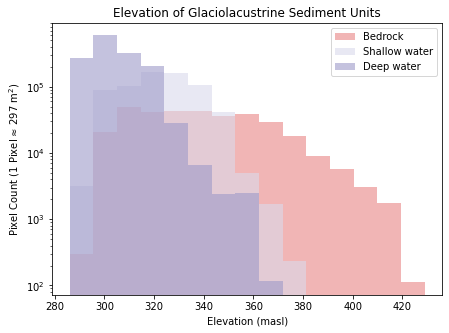

In [24]:
#Histogram of Glacial Lake Subunits & Bedrock
colors = ['#e98585', '#dadaeb', '#9e9ac8']

df11[["Bedrock", "Shallow water", "Deep water"]].plot.hist(alpha=0.6,
                                                     bins=15,
                                                     color=colors,
                                                     log=True,
                                                     grid=False,
                                                     figsize = (7,5))


plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')


plt.title('Elevation of Glaciolacustrine Sediment Units')

## Histograms of Other Surficial Units

In [25]:
#Import data
df12 = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\Elevation_main_units.csv')
df12.head()

print("Min elevation: ")
print(sub_df[["Glaciolacustrine"]].min())

Min elevation: 
Glaciolacustrine    286
dtype: int64


In [26]:
#Color Brewer palettes
#brewermap.m
#https://www.codecademy.com/article/seaborn-design-ii

print("Color Brewer Palettes:")

pal = sns.color_palette("Oranges", 1)
print("Oranges: ", pal.as_hex())

Color Brewer Palettes:
Oranges:  ['#fd8c3b']


Text(0.5, 1.0, 'Elevation of Alluvial Sediments')

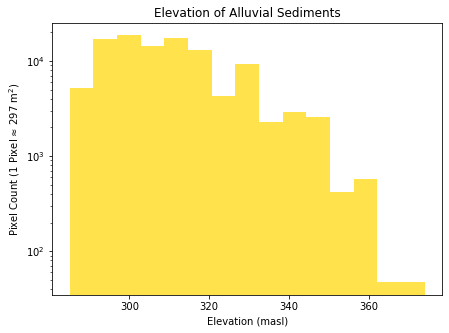

In [27]:
#Histogram for alluvial sediments

colors = ['gold']

df12[["Alluvial"]].plot.hist(alpha=0.7,
                        bins=15,
                        color=colors,
                        log=True,
                        grid=False,
                        figsize = (7,5),
                        legend=False)

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

plt.title('Elevation of Alluvial Sediments')

Text(0.5, 1.0, 'Elevation of Esker Sediments')

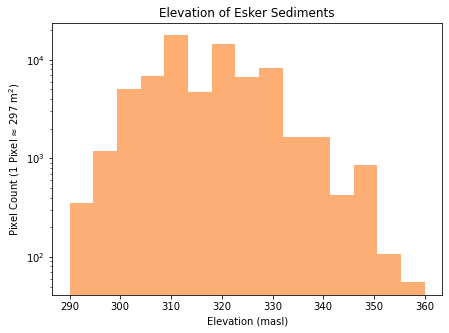

In [28]:
#Histogram for glaciofluvial sediments

colors = ['#fd8c3b']

df12[["Esker"]].plot.hist(alpha=0.7,
                        bins=15,
                        color=colors,
                        log=True,
                        grid=False,
                        figsize = (7,5),
                        legend=False)

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

plt.title('Elevation of Esker Sediments')

Text(0.5, 1.0, 'Elevation of Organic Sediments')

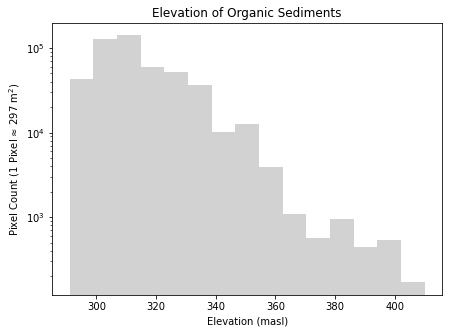

In [29]:
#Histogram for organic sediments

colors = ['silver']

df12[["Organic"]].plot.hist(alpha=0.7,
                        bins=15,
                        color=colors,
                        log=True,
                        grid=False,
                        figsize = (7,5),
                        legend=False)

plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')

plt.title('Elevation of Organic Sediments')

Text(386, 820, '385 masl')

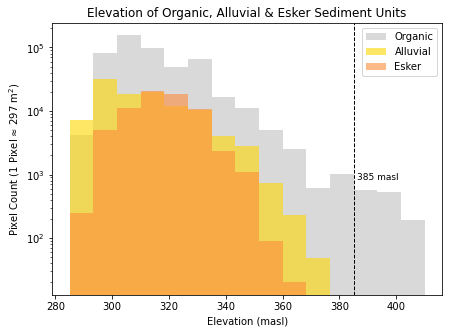

In [30]:
#Histogram of Organic, Alluvial & Esker Sediments
colors = ['silver', 'gold', '#fd8c3b']

df12[["Organic", "Alluvial", "Esker"]].plot.hist(alpha=0.6,
                                                     bins=15,
                                                     color=colors,
                                                     log=True,
                                                     grid=False,
                                                     figsize = (7,5))


plt.xlabel('Elevation (masl)')
plt.ylabel('Pixel Count (1 Pixel \u2248 297 m$^{2}$)')


plt.title('Elevation of Organic, Alluvial & Esker Sediment Units')

#add line
plt.axvline(x=385, color='k', linestyle='--', linewidth=1)

#text for line
plt.text(386, 820, '385 masl', fontsize=9)


#plt.savefig(r'C:\Users\ctayl\Desktop\Malartic\Python\Elevation_organic_alluvial_esker.png', format='png')

# Summary Statistics

In [31]:
#Finding all surficial units from all dataframes

#Extracting features from main units

main=df4[['Till', 'Glaciolacustrine', 'Bedrock']].copy()   
main.head()

,Till,Glaciolacustrine,Bedrock
0,309.0,312,323.0
1,310.0,311,324.0
2,310.0,310,324.0
3,310.0,310,324.0
4,310.0,310,324.0


In [32]:
#Finding all surficial units from all dataframes

#Extracting features from minor units

minor=df12[["Organic", "Alluvial", "Esker"]].copy()   
minor.head()

,Organic,Alluvial,Esker
0,309.0,317.0,310.0
1,310.0,317.0,310.0
2,310.0,317.0,310.0
3,310.0,310.0,310.0
4,310.0,310.0,310.0


In [33]:
#Combine main and minor surficial units into one dataframe

df_all = pd.concat([main, minor], axis=1)

df_all.head()

,Till,Glaciolacustrine,Bedrock,Organic,Alluvial,Esker
0,309.0,312,323.0,309.0,317.0,310.0
1,310.0,311,324.0,310.0,317.0,310.0
2,310.0,310,324.0,310.0,317.0,310.0
3,310.0,310,324.0,310.0,310.0,310.0
4,310.0,310,324.0,310.0,310.0,310.0


In [57]:
#Find summary stats
df_stats = df_all[["Glaciolacustrine", "Till", "Bedrock", "Organic", "Alluvial", "Esker"]].describe()

df_stats

,Glaciolacustrine,Till,Bedrock,Organic,Alluvial,Esker
count,2.147211e+06,789752.000000,338708.000000,490602.000000,108007.000000,70018.000000
mean,3.103993e+02,340.520019,339.815835,313.990322,310.390975,317.028307
std,1.404476e+01,22.223319,25.470327,14.846605,15.013192,10.766682
min,2.860000e+02,290.000000,294.000000,291.000000,285.000000,290.000000
25%,3.000000e+02,325.000000,319.000000,304.000000,299.000000,310.000000
50%,3.080000e+02,340.000000,338.000000,310.000000,308.000000,317.000000
75%,3.190000e+02,353.000000,360.000000,322.000000,320.000000,324.000000
max,3.800000e+02,430.000000,429.000000,410.000000,374.000000,360.000000


In [ ]:
#Export to csv

#df_stats.to_csv('elevation_stats.csv')

In [52]:
#More stats

print("Median: ")
df_all[["Glaciolacustrine", "Till", "Bedrock", "Organic", "Alluvial", "Esker"]].median()

Median: 


Glaciolacustrine    308.0
Till                340.0
Bedrock             338.0
Organic             310.0
Alluvial            308.0
Esker               317.0
dtype: float64

In [50]:
print("Mode: ")
df_all[["Glaciolacustrine", "Till", "Bedrock", "Organic", "Alluvial", "Esker"]].mode()

Mode: 


,Glaciolacustrine,Till,Bedrock,Organic,Alluvial,Esker
0,294,340.0,310.0,310.0,300.0,310.0


In [51]:
print("Var: ")
df_all[["Glaciolacustrine", "Till", "Bedrock", "Organic", "Alluvial", "Esker"]].var()

Var: 


Glaciolacustrine    197.255265
Till                493.875927
Bedrock             648.737558
Organic             220.421671
Alluvial            225.395922
Esker               115.921446
dtype: float64

In [53]:
#Finding all surficial subunits from glaciolacustrine seds

sub_df2

,Deep water,Deep-to-shallow,Shallow water
0,310,298.0,312.0
1,310,298.0,311.0
2,310,298.0,310.0
3,310,297.0,310.0
4,310,297.0,310.0
...,...,...,...
1429231,317,NaN,NaN
1429232,317,NaN,NaN
1429233,317,NaN,NaN
1429234,318,NaN,NaN


In [54]:
#Finding all surficial subunits from till

df5

,Continuous,Discontinuous
0,309.0,313
1,310.0,313
2,310.0,314
3,310.0,314
4,310.0,320
...,...,...
552000,NaN,309
552001,NaN,309
552002,NaN,310
552003,NaN,310


In [55]:
#Combine glaciolac and till subunits into one dataframe

df_allsubs = pd.concat([sub_df2, df5], axis=1)

df_allsubs

,Deep water,Deep-to-shallow,Shallow water,Continuous,Discontinuous
0,310,298.0,312.0,309.0,313.0
1,310,298.0,311.0,310.0,313.0
2,310,298.0,310.0,310.0,314.0
3,310,297.0,310.0,310.0,314.0
4,310,297.0,310.0,310.0,320.0
...,...,...,...,...,...
1429231,317,NaN,NaN,NaN,NaN
1429232,317,NaN,NaN,NaN,NaN
1429233,317,NaN,NaN,NaN,NaN
1429234,318,NaN,NaN,NaN,NaN


In [59]:
#Find summary stats for subunits
df_stats2 = df_allsubs[["Deep water", "Deep-to-shallow", "Shallow water", "Continuous", "Discontinuous"]].describe()

df_stats2

,Deep water,Deep-to-shallow,Shallow water,Continuous,Discontinuous
count,1.429236e+06,41794.000000,676117.000000,237721.000000,552005.000000
mean,3.047799e+02,300.872518,322.866079,338.706151,341.302474
std,9.566491e+00,5.598026,14.256659,28.657845,18.730690
min,2.860000e+02,294.000000,294.000000,293.000000,290.000000
25%,2.970000e+02,296.000000,312.000000,317.000000,330.000000
50%,3.030000e+02,299.000000,322.000000,330.000000,340.000000
75%,3.100000e+02,305.000000,333.000000,357.000000,353.000000
max,3.680000e+02,326.000000,380.000000,430.000000,417.000000


In [60]:
#Export to csv
df_stats2.to_csv('elevation_stats_subunits.csv')

In [61]:
#More stats

print("Median: ")
df_allsubs[["Deep water", "Deep-to-shallow", "Shallow water", "Continuous", "Discontinuous"]].median()

Median: 


Deep water         303.0
Deep-to-shallow    299.0
Shallow water      322.0
Continuous         330.0
Discontinuous      340.0
dtype: float64

In [62]:
#More stats

print("Mode: ")
df_allsubs[["Deep water", "Deep-to-shallow", "Shallow water", "Continuous", "Discontinuous"]].mode()

Mode: 


,Deep water,Deep-to-shallow,Shallow water,Continuous,Discontinuous
0,294,296.0,330.0,330.0,340.0


In [63]:
#More stats

print("Variance: ")
df_allsubs[["Deep water", "Deep-to-shallow", "Shallow water", "Continuous", "Discontinuous"]].var()

Variance: 


Deep water          91.517757
Deep-to-shallow     31.337898
Shallow water      203.252330
Continuous         821.272091
Discontinuous      350.838755
dtype: float64

In [64]:
#Make master df with all elevation pixels

df_master = pd.concat([df_all, df_allsubs], axis=1)

df_master

,Till,Glaciolacustrine,Bedrock,Organic,Alluvial,Esker,Deep water,Deep-to-shallow,Shallow water,Continuous,Discontinuous
0,309.0,312,323.0,309.0,317.0,310.0,310.0,298.0,312.0,309.0,313.0
1,310.0,311,324.0,310.0,317.0,310.0,310.0,298.0,311.0,310.0,313.0
2,310.0,310,324.0,310.0,317.0,310.0,310.0,298.0,310.0,310.0,314.0
3,310.0,310,324.0,310.0,310.0,310.0,310.0,297.0,310.0,310.0,314.0
4,310.0,310,324.0,310.0,310.0,310.0,310.0,297.0,310.0,310.0,320.0
...,...,...,...,...,...,...,...,...,...,...,...
2147206,NaN,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147207,NaN,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147208,NaN,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2147209,NaN,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#Export to csv

df_master.to_csv('elevation_master.csv')